In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_finalnews247.csv')

In [4]:
df.set_index('Unnamed: 0' , inplace=True)

In [5]:
df

,Link,Title,Date,Summary,Text,Tag
Unnamed: 0,,,,,,
0,https://www.news247.gr/politiki/mitsotakis-pre...,"Μητσοτάκης: ""Πρέπει να προσαρμόσουμε την αγορά...",05 Μαΐου 2021 13:52,"“Αφήσαμε την κρίση πίσω μας για τα καλά”, υποσ...",\nΣτη συνέχιση των μεταρρυθμίσεων επέμεινε ο π...,ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ
1,https://www.news247.gr/politiki/symmetochi-toy...,Συμμετοχή του Μητσοτάκη στην τηλεδιάσκεψη των ...,05 Μαΐου 2021 11:48,Οι ηγέτες αντάλλαξαν απόψεις για την επιδημιολ...,\nΟ Πρωθυπουργός Κυριάκος Μητσοτάκης έλαβε μέρ...,ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ
2,https://www.news247.gr/koinonia/arsi-metron-i-...,Άρση μέτρων: Η εστίαση είναι εδώ: Τι θα γίνει ...,05 Μαΐου 2021 11:05,Τα επόμενα βήματα για την επιστροφή στην κανον...,\nΣε ρυθμούς... κανονικότητας επανέρχεται σταδ...,ΑΡΣΗ ΜΕΤΡΩΝ
3,https://www.news247.gr/koinonia/grigorakos-eme...,"Λεωνίδας Γρηγοράκος: ""Έμεινα διασωληνωμένος δύ...",05 Μαΐου 2021 10:15,"Για την εξαντλητική μάχη του με τον κορονοϊό, ...",\nΓια τον εφιάλτη που βίωσε δίνοντας μάχη με τ...,ΚΟΡΟΝΟΪΟΣ
4,https://www.news247.gr/oikonomia/to-ypsilo-kos...,Το υψηλό κόστος των τεστ PCR φρενάρει τα αεροπ...,05 Μαΐου 2021 10:12,Εκκληση της Διεθνούς Ένωσης Αεροπορικών Μεταφο...,\nΟσοι έχουν γνωστούς που έρχονται από το εξωτ...,ΚΟΡΟΝΟΪΟΣ
...,...,...,...,...,...,...
7353,https://www.news247.gr/koinonia/estiasi-me-pel...,Εστίαση: Με πελάτες στα καταστήματα μετά από έ...,03 Μαΐου 2021 13:45,"Άνοιξαν την Δευτέρα του Πάσχα τα μπαρ, εστιατό...",\nΤις πόρτες τους άνοιξαν και πάλι από τη Δευτ...,ΕΣΤΙΑΣΗ
7354,https://www.news247.gr/koinonia/theodoros-kats...,Θεόδωρος Κατσανέβας: Διασωληνωμένος με κορονοϊ...,03 Μαΐου 2021 11:07,"Ο πρώην βουλευτής του ΠΑΣΟΚ, Θεόδωρος Κατσανέβ...",\nΔιασωληνώθηκε ο 74χρονος καθηγητής του Πανεπ...,ΚΟΡΟΝΟΪΟΣ
7355,https://www.news247.gr/politiki/deytera-politi...,Η πολιτική στη δίνη της πανδημίας,03 Μαΐου 2021 11:03,To NEWS 24/7 συζητά με τον πολιτικό αναλυτή τη...,\nΜε τον πλανήτη να κινείται για περισσότερο α...,ΚΟΡΟΝΟΪΟΣ


In [6]:
articlesJune = df[df['Date'].str.contains ('Ιουνίου')]

In [7]:
articlesJune22 = articlesJune[articlesJune['Date'].str.contains ('2022')]

In [8]:
articlesJune22

,Link,Title,Date,Summary,Text,Tag
Unnamed: 0,,,,,,
80,https://www.news247.gr/ygeia/magiorkinis-o-gen...,Μαγιορκίνης: O γενικός πληθυσμός δεν χρειάζετα...,29 Ιουνίου 2022 13:57,Ο καθηγητής τόνισε πως θα έχουμε αποκλιμάκωση ...,\n«Βρισκόμαστε σε επιφυλακή για την πορεία της...,ΕΜΒΟΛΙΟ
81,https://www.news247.gr/celebrities/thetikos-st...,Θετικός στον κορονοϊό ο Ανδρέας Μικρούτσικος,29 Ιουνίου 2022 10:42,Θετικός στην Covid-19 βρέθηκε ο Ανδρέας Μικρού...,"\nΑπών από την εκπομπή ""Super Katerina"" της Τε...",ΑΝΔΡΕΑΣ ΜΙΚΡΟΥΤΣΙΚΟΣ
82,https://www.news247.gr/koinonia/pleyris-den-th...,Πλεύρης: Δεν θα λάβουμε μέτρα - Σε λογική συνύ...,29 Ιουνίου 2022 08:52,Ο υπουργός Υγείας τόνισε ότι αυτή τη στιγμή τα...,\nΤη διαβεβαίωση ότι δε θα ληφθούν μέτρα κατά ...,ΚΟΡΟΝΟΪΟΣ
83,https://www.news247.gr/ygeia/koronoios-kalpazo...,Κορονοϊός: Καλπάζουν αλλά δεν τρομάζουν οι Όμι...,29 Ιουνίου 2022 06:13,Μπορεί να είναι οι πιο μεταδοτικές παραλλαγές ...,\nΞεπερνούν καθημερινά τις δέκα χιλιάδες τα νέ...,ΜΕΤΑΛΛΑΞΗ ΟΜΙΚΡΟΝ
84,https://www.news247.gr/koinonia/sarigiannis-ka...,Σαρηγιάννης: Και πάλι στους 400 οι διασωληνωμέ...,28 Ιουνίου 2022 19:35,Στην κορύφωση του κύματος της πανδημίας που εί...,\nΟ κ. Σαρηγιάννης αναμένει κορύφωση του «κύμα...,ΠΑΝΔΗΜΙΑ
...,...,...,...,...,...,...
253,https://www.news247.gr/koinonia/koronoios-4-02...,Κορονοϊός: 4.026 νέα κρούσματα σήμερα στην Ελλ...,01 Ιουνίου 2022 15:37,4.026 νέα κρούσματα σήμερα στην Ελλάδα ανακοίν...,\nΟ Εθνικός Οργανισμός Δημόσιας Υγείας (ΕΟΔΥ) ...,ΚΟΡΟΝΟΪΟΣ
254,https://www.news247.gr/ygeia/koronoios-ti-deic...,Κορονοϊός: Τι δείχνει η πρώτη άμεση σύγκριση τ...,01 Ιουνίου 2022 13:08,Η πρώτη μελέτη που συγκρίνει τα αποτελέσματα τ...,\nΕπιστήμονες του Ινστιτούτου Ανοσολογίας La J...,ΚΟΡΟΝΟΪΟΣ
255,https://www.news247.gr/ygeia/pleyris-ton-septe...,Πλεύρης: Τον Σεπτέμβριο οι νέες αποφάσεις για ...,01 Ιουνίου 2022 10:43,Στην κατάργηση της μάσκας σε εσωτερικούς χώρου...,\nΤον Σεπτέμβρη και σύμφωνα με την εικόνα της ...,ΚΟΡΟΝΟΪΟΣ


In [9]:
text = articlesJune22['Summary'].str.cat(sep = ' ').replace("amp", ' ')

In [10]:
text

'Ο καθηγητής τόνισε πως θα έχουμε αποκλιμάκωση της επιδημίας πριν από τον Σεπτέμβριο ενώ αναφορικά με την τέταρτη δόση του εμβολίου σημείωσε πως ο γενικός πληθυσμός δεν χρειάζεται να την κάνει. Θετικός στην Covid-19 βρέθηκε ο Ανδρέας Μικρούτσικος, όπως ενημέρωσε τους τηλεθεατές της εκπομπής της η Κατερίνα Καινούργιου. Η κατάσταση της υγείας του.  Ο υπουργός Υγείας τόνισε ότι αυτή τη στιγμή τα κρούσματα δε προκαλούν ανησυχία. "Μας απασχολούν αν αυτά μεταφέρονται σε νοσηλείες και κυρίως σε βαριές νοσηλείες", επεσήμανε. Μπορεί να είναι οι πιο μεταδοτικές παραλλαγές κορονοϊού και να προκαλούν πυρετό, όμως οι υποπαραλλαγές Όμικρον 4 και 5 δεν έχουν δείξει να προκαλούν βαριά νόηση.  Στην κορύφωση του κύματος της πανδημίας που είναι σε εξέλιξη αναφέρθηκε ο Δημοσθένης Σαρηγιάννης. Γρήγορη αύξηση των εισαγωγών σε απλές κλίνες και ΜΕΘ προβλέπει ο Καθηγητής. Πώς κατανέμονται γεωγραφικά τα 20.084 νέα κρούσματα που ανακοίνωσε την Τρίτη ο ΕΟΔΥ. Αναλυτικά η γεωγραφική κατανομή των 12.606 νέων κρουσμά

In [11]:
import spacy

In [12]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 28.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [13]:
nlp = spacy.load('el_core_news_sm')

In [14]:
list(nlp.Defaults.stop_words)[0:20]

['δι',
 'πολύ',
 'οσωνδήποτε',
 'τόσης',
 'λοιπά',
 'αν',
 'οσοδήποτε',
 'τούτα',
 'δίπλα',
 'πόσος',
 'εντωμεταξύ',
 'μακάρι',
 'το',
 'μόνην',
 'κλπ',
 'όχι',
 'έπειτα',
 'έχεις',
 'μερικών',
 'εκείνων']

In [15]:
full_doc = nlp(text)

In [16]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [17]:
clear_text[200:400]

'd-19 βρέθηκε ο Ανδρέας Μικρούτσικος , όπως ενημέρωσε ο τηλεθεατής ο εκπομπή ο ο κατερίνα Καινούργιου . ο κατάσταση ο υγεία μου .   ο υπουργός υγεία τονίζω ότι αυτός ο στιγμή ο κρούσμα δε προκαλώ ανησυ'

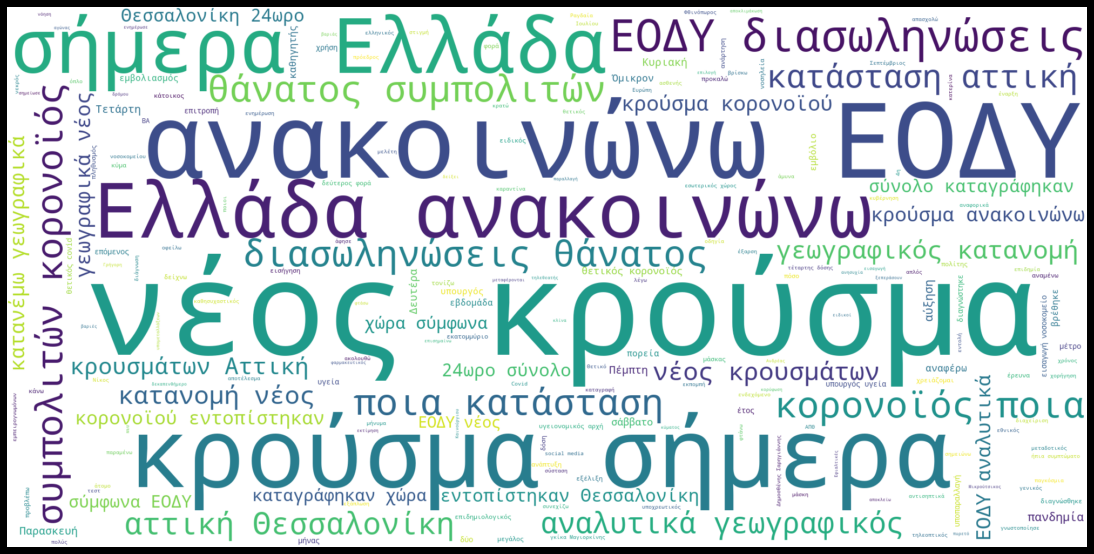

In [35]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (15, 25),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [20]:
count_vector = cv.fit_transform(articlesJune22['Summary'])

In [21]:
count_vector.shape

(178, 958)

In [22]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,012,013,020,026,034,04,040,05,06,...,όπισθεν,όπλο,όπου,όπως,όσα,ότι,όφελός,ύπατος,ύφεση,ώρα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [24]:
count_vector = cv.fit_transform(articlesJune22['Summary'])

In [25]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,06,082,083,084,10,109,11,110,12,13,...,φθινόπωρο,φορά,χορήγησης,χρήση,χρειάζεται,χρόνια,χώρα,χώρους,όμικρον,όπλο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [27]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(articlesJune22['Summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10.474,10.528,109,11.972,110,12.082,12.537,14/06,15/06,16/06,...,φορά,φτάνω,χορήγηση,χρήση,χρειάζομαι,χρόνος,χώρα,χώρος,όμικρον,όπλο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(articlesJune22['Summary'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ανακοίνωσε,αναλυτικά,αττική,διασωληνώσεις,ελλάδα,εοδυ,θάνατοι,θεσσαλονίκη,κατάσταση,κατανομή,κορονοϊού,κορονοϊό,κρουσμάτων,κρούσματα,νέα,νέων,ποια,σήμερα,συμπολιτών,σύμφωνα
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(articlesJune22['Summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,κυβέρνηση,κυριάκος,κυριακή
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [30]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=30, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(articlesJune22['Summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,06 εοδυ,24ωρο σύνολο,covid 19,ανακοίνωσε εοδυ,ανακοίνωσε κυριακή,ανακοίνωσε παρασκευή,ανακοίνωσε σάββατο,αναλυτικά γεωγραφική,αττική θεσσαλονίκη,γεωγραφική κατανομή,...,κρούσματα ανακοίνωσε,κρούσματα κορονοϊού,κρούσματα σήμερα,νέα κρούσματα,νέων κρουσμάτων,ποια κατάσταση,σήμερα ελλάδα,συμπολιτών κορονοϊό,σύμφωνα εοδυ,χώρα σύμφωνα
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
results.sum(axis =0).sort_values(ascending = False)

νέα κρούσματα               53
ανακοίνωσε εοδυ             28
θάνατοι συμπολιτών          27
κορονοϊό ποια               27
συμπολιτών κορονοϊό         27
σήμερα ελλάδα               27
ποια κατάσταση              27
αττική θεσσαλονίκη          27
κρούσματα σήμερα            27
κατάσταση αττική            27
ελλάδα ανακοίνωσε           27
νέων κρουσμάτων             26
κρούσματα κορονοϊού         26
κρουσμάτων αττική           26
γεωγραφική κατανομή         26
αναλυτικά γεωγραφική        26
κρούσματα ανακοίνωσε        25
κατανέμονται γεωγραφικά     25
σύμφωνα εοδυ                24
καταγράφηκαν χώρα           24
χώρα σύμφωνα                24
κορονοϊού εντοπίστηκαν      24
24ωρο σύνολο                24
εντοπίστηκαν θεσσαλονίκη    24
06 εοδυ                     11
διασωληνώσεις θάνατοι        9
covid 19                     5
ανακοίνωσε σάββατο           4
ανακοίνωσε παρασκευή         4
ανακοίνωσε κυριακή           4
dtype: int64

In [32]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20)  

νέα κρούσματα              53
ανακοίνωσε εοδυ            28
θάνατοι συμπολιτών         27
κορονοϊό ποια              27
συμπολιτών κορονοϊό        27
σήμερα ελλάδα              27
ποια κατάσταση             27
αττική θεσσαλονίκη         27
κρούσματα σήμερα           27
κατάσταση αττική           27
ελλάδα ανακοίνωσε          27
νέων κρουσμάτων            26
κρούσματα κορονοϊού        26
κρουσμάτων αττική          26
γεωγραφική κατανομή        26
αναλυτικά γεωγραφική       26
κρούσματα ανακοίνωσε       25
κατανέμονται γεωγραφικά    25
σύμφωνα εοδυ               24
καταγράφηκαν χώρα          24
dtype: int64

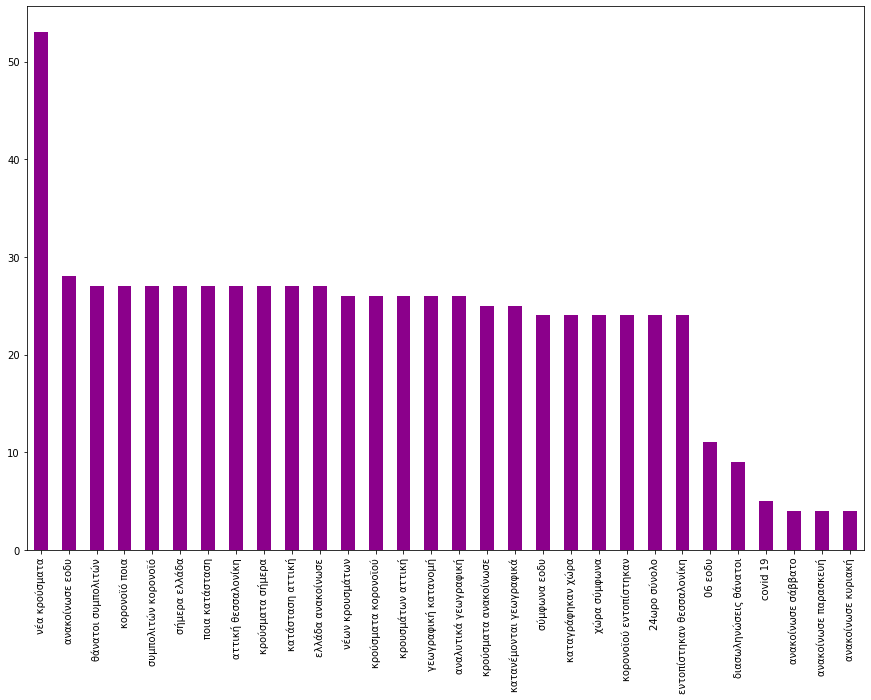

In [33]:
sum_words.sort_values(ascending = False).head(30).plot(kind = 'bar', figsize=(15,10), color='#8B008B')

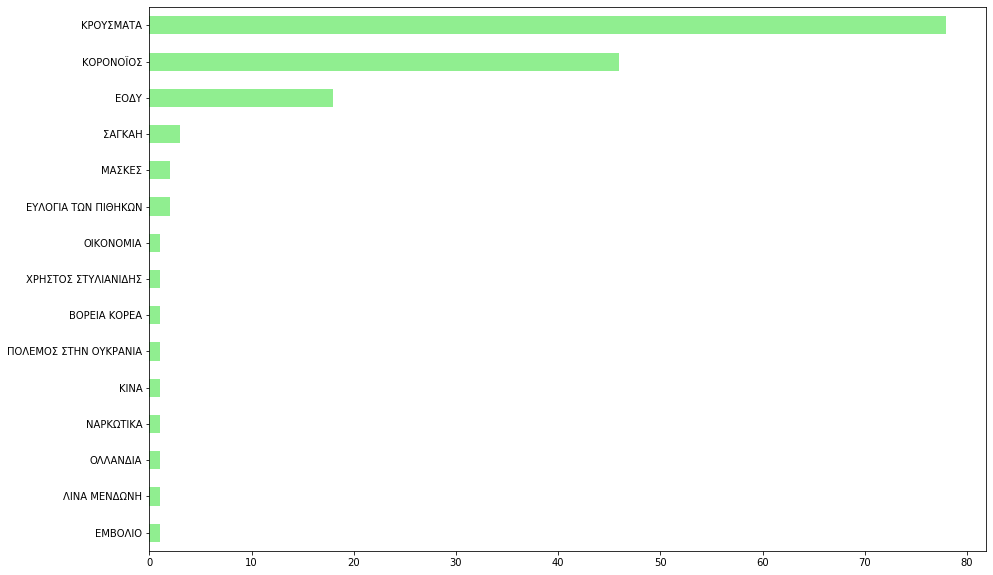

In [36]:
articlesJune22['Tag'].value_counts().head(15).sort_values().plot(kind='barh', figsize=(15,10), color='lightgreen')